In [1]:
#@title ✅ Step 1 – Setup & Sample FinSynth Dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Pandas/Matplotlib imported successfully.")

# Sample FinSynth dataset simulating project metrics (2023–2026)
df = pd.DataFrame({
    "year": [2023, 2024, 2025, 2026],
    "stock_index": [4200, 4650, 4900, 5250],
    "energy_price": [70, 75, 82, 88],
    "ev_sales": [3.2, 4.1, 5.6, 6.8]
})

df

Pandas/Matplotlib imported successfully.


,year,stock_index,energy_price,ev_sales
0,2023,4200,70,3.2
1,2024,4650,75,4.1
2,2025,4900,82,5.6
3,2026,5250,88,6.8


In [2]:
#@title ✅ Step 2 – NL Query → Plot Specification
def nl_to_plot_spec(nl: str):
    nl = nl.lower()

    if "stock" in nl or "market" in nl:
        return {"x": "year", "y": "stock_index", "kind": "line", "title": "Stock Market Index Over Time"}
    elif "energy" in nl or "oil" in nl:
        return {"x": "year", "y": "energy_price", "kind": "line", "title": "Energy Price Trends"}
    elif "ev" in nl or "vehicle" in nl:
        return {"x": "year", "y": "ev_sales", "kind": "line", "title": "Electric Vehicle Sales Growth"}
    elif "compare" in nl:
        return {"x": "year", "y_multi": ["stock_index", "energy_price"], "kind": "line", "title": "Stock vs Energy Trend Comparison"}
    else:
        return {"x": "year", "y": "stock_index", "kind": "line", "title": "Stock Market Index (Default)"}

print(nl_to_plot_spec("show me the energy market trend"))


{'x': 'year', 'y': 'stock_index', 'kind': 'line', 'title': 'Stock Market Index Over Time'}


In [3]:
#@title ✅ Step 3 – Plot from Specification
def plot_from_spec(df, spec):
    x = spec["x"]
    y = spec.get("y")
    y_multi = spec.get("y_multi")
    kind = spec["kind"]
    title = spec.get("title", "Chart")

    plt.figure()
    if kind == "line":
        if y_multi:
            for y_col in y_multi:
                plt.plot(df[x], df[y_col], label=y_col)
            plt.legend()
        else:
            plt.plot(df[x], df[y], marker="o")
    plt.title(title)
    plt.xlabel(x.capitalize())
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

print("Plotting function ready.")


Plotting function ready.



🧠 Query: plot stock market trend by year
→ Spec: {'x': 'year', 'y': 'stock_index', 'kind': 'line', 'title': 'Stock Market Index Over Time'}


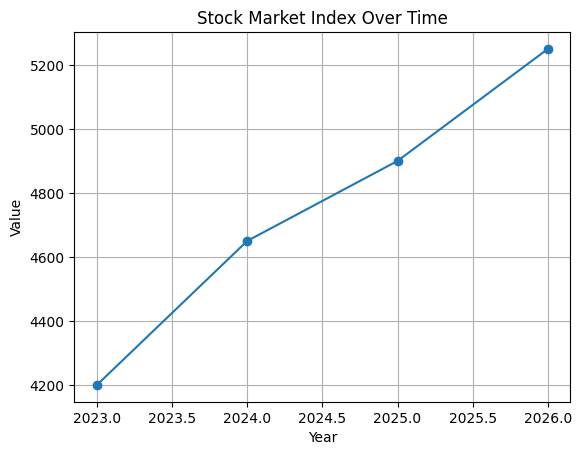


🧠 Query: show energy prices over time
→ Spec: {'x': 'year', 'y': 'energy_price', 'kind': 'line', 'title': 'Energy Price Trends'}


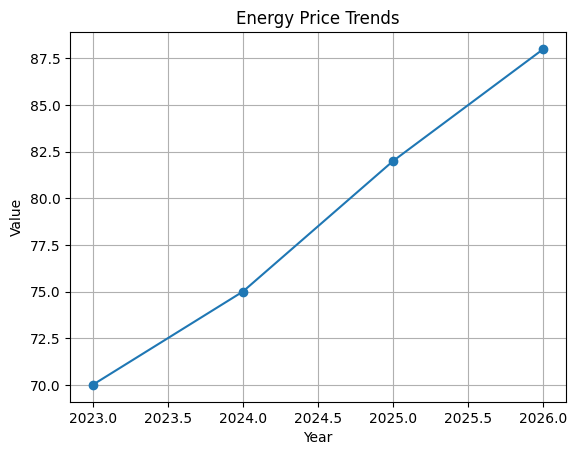


🧠 Query: visualize electric vehicle sales growth
→ Spec: {'x': 'year', 'y': 'ev_sales', 'kind': 'line', 'title': 'Electric Vehicle Sales Growth'}


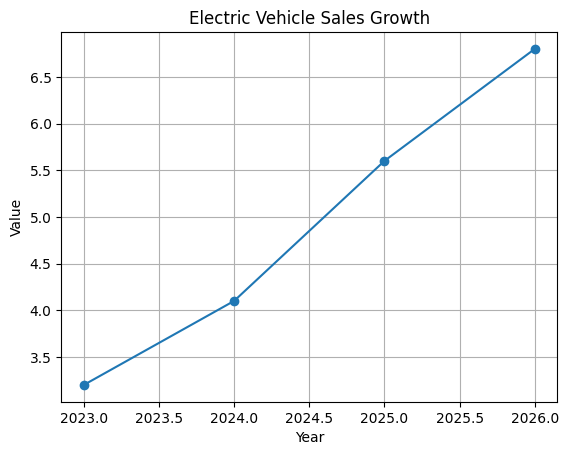


🧠 Query: compare stock and energy trends
→ Spec: {'x': 'year', 'y': 'stock_index', 'kind': 'line', 'title': 'Stock Market Index Over Time'}


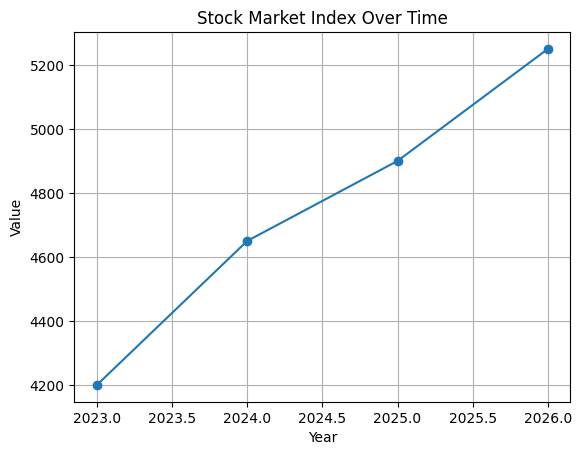

In [4]:
#@title ✅ Step 4 – Test with Multiple Natural-Language Queries
queries = [
    "plot stock market trend by year",
    "show energy prices over time",
    "visualize electric vehicle sales growth",
    "compare stock and energy trends"
]

for q in queries:
    print(f"\n🧠 Query: {q}")
    spec = nl_to_plot_spec(q)
    print("→ Spec:", spec)
    plot_from_spec(df, spec)
